In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2,Xception,VGG19
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
train_dir = "/kaggle/input/messy-vs-clean-room/images/train" #passing the path with training images
validation_dir = "/kaggle/input/messy-vs-clean-room/images/val"   #passing the path with validation images

In [ ]:
IMG_SIZE= 224 #our image size that we will be using

In [ ]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                  target_size = (IMG_SIZE,IMG_SIZE),
                                                   color_mode = "rgb",
                                                   class_mode = "categorical",
                                                   batch_size = 10)
validation_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                    target_size = (IMG_SIZE,IMG_SIZE),
                                                   color_mode = "rgb",
                                                   class_mode = "categorical",
                                                   batch_size = 10)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
"""model = tf.keras.Sequential()
model.add(VGG16(include_top = False,weights = 'imagenet',input_shape= (IMG_SIZE,IMG_SIZE,3)))
model.add(Flatten())
model.add(Dense(2,activation = 'softmax'))"""

"model = tf.keras.Sequential()\nmodel.add(VGG16(include_top = False,weights = 'imagenet',input_shape= (IMG_SIZE,IMG_SIZE,3)))\nmodel.add(Flatten())\nmodel.add(Dense(2,activation = 'softmax'))"

In [ ]:
model = tf.keras.Sequential()
model.add(VGG19(include_top=False, weights='imagenet',input_shape=[IMG_SIZE,IMG_SIZE,3]))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50178     
Total params: 20,074,562
Trainable params: 20,074,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = Adam(lr = 0.0001)
model.compile(loss = "categorical_crossentropy",optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
epochs = 10
batch_size = 10

In [ ]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/10
20/20 [==============================] - 6s 240ms/step - loss: 0.6114 - accuracy: 0.6780 - val_loss: 0.1256 - val_accuracy: 0.9500
Epoch 2/10
20/20 [==============================] - 4s 199ms/step - loss: 0.4669 - accuracy: 0.7874 - val_loss: 0.1917 - val_accuracy: 0.9500
Epoch 3/10
20/20 [==============================] - 4s 176ms/step - loss: 0.4952 - accuracy: 0.7900 - val_loss: 0.4422 - val_accuracy: 0.7500
Epoch 4/10
20/20 [==============================] - 4s 188ms/step - loss: 0.4067 - accuracy: 0.8232 - val_loss: 0.1518 - val_accuracy: 0.9000
Epoch 5/10
20/20 [==============================] - 4s 175ms/step - loss: 0.1592 - accuracy: 0.9605 - val_loss: 0.1982 - val_accuracy: 0.9500
Epoch 6/10
20/20 [==============================] - 4s 178ms/step - loss: 0.2329 - accuracy: 0.9163 - val_loss: 0.2317 - val_accuracy: 0.9000
Epoch 7/10
20/20 [==============================] - 4s 188ms/step - loss: 0.1976 - accuracy: 0.9325 - val_loss: 0.1605 - val_accuracy: 0.9500
Epoch 

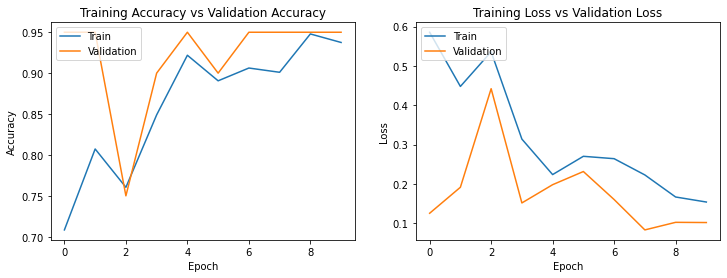

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('messy_clean_model(vgg19).h5')

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

2/2 [==============================] - 0s 58ms/step - loss: 0.1021 - accuracy: 0.9500
final train accuracy = 98.96 , validation accuracy = 95.00


In [ ]:
from keras.models import load_model
from keras.applications.vgg19 import preprocess_input

In [ ]:
""" For testing the model - 
model = load_model('messy_clean_model(vgg19).h5')
img = image.load_img('/kaggle/input/messy-vs-clean-room/images/test/5.png', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)"""

In [ ]:
#classes

array([[0., 1.]], dtype=float32)